In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from common_codes.utils import Utils
import numpy as np

In [2]:
## Reading the CSV file with the help of common codes module that is installed in the system via pyproject.toml file

df = pd.read_csv(Utils.get_file_path('height-weight.csv'))
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [3]:
## Reading the CSV file with the help of common codes 2 module by directly adding the  path to the sys.path

import os
import sys

sys.path.append(os.path.join(os.getcwd(), '..'))

from common_codes_2.utils2 import Utils2

df = pd.read_csv(Utils2.get_file_path_2('height-weight.csv'))

df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


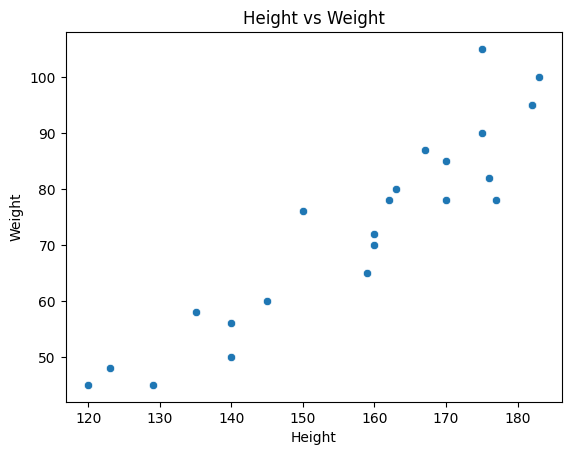

In [4]:
## Check the relationship between height and weight

sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Height vs Weight')
plt.show()

In [5]:
## divide our dataset into independent and dependent edatures
X=df[['Weight']] ##independent feature
y=df['Height'] ##dependent feature

In [6]:
## Train Test Split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [7]:
## Standardization (Standardization only applies to Input Features only because Gardient Descent is only applied to Input Features)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  ## For train data we use fit_transform

X_test = scaler.transform(X_test)  ## For test data we use transform only because we need to use the same mean and standard deviation of train data

## Why we don't use fit_transform for test data? is because of the Data Leakage problem. We don't want test data to know anything about the train data. This improves the model performance.

In [8]:
## Apply Linear Regression

from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)


LinearRegression()

In [9]:

print("Coefficient  or Slope:" , regression.coef_)  ## Beta1 from the equation

print("Intercept:" , regression.intercept_)  ## Beta0 from the equation

Coefficient  or Slope: [17.2982057]
Intercept: 156.47058823529412


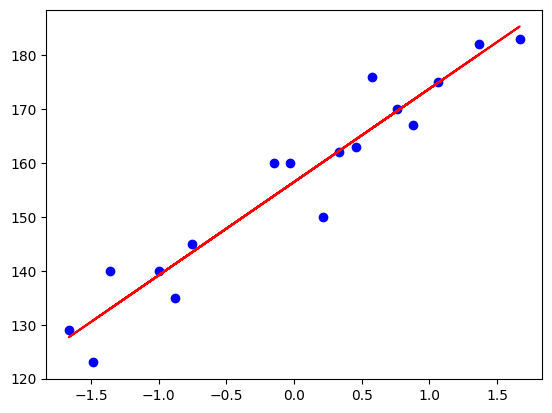

In [10]:
## Plot Training Data best fit line

plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regression.predict(X_train), color='red')

#### Prediction of test data
1. Predicted height output = intercept + coef * wights
2. y_pred = 156.470 + 17.29 * X_test

In [11]:
## Prediction for Test Data
y_pred = regression.predict(X_test)

In [12]:
## Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


In [13]:
## R2 Score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.7360826717981276


In [14]:
## Adjusted R2 Score

1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [15]:
## OLS Linear Regression

import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [16]:
prediction = model.predict(X_test)

In [17]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Tue, 22 Oct 2024   Prob (F-statistic):                       0.664
Time:                        06:54:31   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Users/murtuzasaifee/Documents/Personal/Codes/python_ml_nlp/venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [20]:
## Prediction for New Data
## We need to scale the new data before making predictions because the model is trained on scaled data, otherwise it will give wrong predictions.
regression.predict(scaler.transform([[72]]))

/Users/murtuzasaifee/Documents/Personal/Codes/python_ml_nlp/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])